In [1]:
import plotly.express as px
from glob import glob
import os
import pandas as pd
import csv
import numpy as np
import seaborn as sns
from collections import defaultdict
import plotly.graph_objects as go
from matplotlib import pyplot as plt

In [2]:
img_dir = 'images'
os.makedirs(img_dir, exist_ok=True)

# DFIV Results

In [40]:
DUMP_DIR = '../dumps'
keys = ['Original Data', 'Simulated Data', 'Simulated Non-homoscedastic Data with sigma=0.2', 'Simulated Non-homoscedastic Data with sigma=1', 'Simulated Non-homoscedastic Data with sigma=1.8']
dirs = ['dfiv', 'dfiv_original', 'dfiv_hetero0.2', 'dfiv_hetero1', 'dfiv_hetero1.8']
oi = {key: dir for key, dir in zip(keys, dirs)}

In [41]:
def get_results(oi):
    alldict = defaultdict(list)
    for key, dir in oi.items():
        m = 0
        for subdir in glob(os.path.join(DUMP_DIR, dir, 'data_size*')):
            params = [param.split(':') for param in subdir.split('/')[-1].split('-')]
            
            if os.path.exists(os.path.join(subdir, 'result.csv')):
                with open (os.path.join(subdir, 'result.csv'), 'r') as f:
                    reader = csv.reader(f)
                    mse = [float(row[0]) for row in list(reader)]
                    n = len(mse)
                    m += n

                params = {param[0]: [float(param[1])] * n for param in params}
                subdict = {**params, 'mse': mse, 'case': [key] * n}
                alldict = {key: subdict[key] + alldict[key] for key in subdict.keys()}
    return pd.DataFrame(alldict)

In [42]:
df =  get_results(oi)
df

,data_size,rho,mse,case
0,1000.0,0.5,830.545532,Simulated Non-homoscedastic Data with sigma=1.8
1,1000.0,0.5,1198.522339,Simulated Non-homoscedastic Data with sigma=1.8
2,1000.0,0.5,984.446899,Simulated Non-homoscedastic Data with sigma=1.8
3,1000.0,0.5,1185.703979,Simulated Non-homoscedastic Data with sigma=1.8
4,1000.0,0.5,1215.752075,Simulated Non-homoscedastic Data with sigma=1.8
...,...,...,...,...
195,1000.0,0.1,1114.532593,Original Data
196,1000.0,0.1,736.397644,Original Data
197,1000.0,0.1,1416.458740,Original Data
198,1000.0,0.1,991.781067,Original Data


In [43]:
df_avg = df.groupby(['data_size', 'rho', 'case']).mean()
df_avg = df_avg.reset_index()
df_avg

,data_size,rho,case,mse
0,1000.0,0.1,Original Data,1158.039597
1,1000.0,0.1,Simulated Data,1186.400485
2,1000.0,0.1,Simulated Non-homoscedastic Data with sigma=0.2,1162.693053
3,1000.0,0.1,Simulated Non-homoscedastic Data with sigma=1,1042.768924
4,1000.0,0.1,Simulated Non-homoscedastic Data with sigma=1.8,1393.387570
5,1000.0,0.5,Original Data,1112.588321
6,1000.0,0.5,Simulated Data,1110.746127
7,1000.0,0.5,Simulated Non-homoscedastic Data with sigma=0.2,1237.549808
8,1000.0,0.5,Simulated Non-homoscedastic Data with sigma=1,1116.412695
9,1000.0,0.5,Simulated Non-homoscedastic Data with sigma=1.8,1177.893301


In [63]:
df_std = df.groupby(['data_size', 'rho', 'case'])['mse'].std()
df_std = df_std.reset_index()
df_std

,data_size,rho,case,mse
0,1000.0,0.1,Original Data,245.494102
1,1000.0,0.1,Simulated Data,331.210475
2,1000.0,0.1,Simulated Non-homoscedastic Data with sigma=0.2,293.094268
3,1000.0,0.1,Simulated Non-homoscedastic Data with sigma=1,291.120245
4,1000.0,0.1,Simulated Non-homoscedastic Data with sigma=1.8,838.432710
5,1000.0,0.5,Original Data,273.087264
6,1000.0,0.5,Simulated Data,419.245661
7,1000.0,0.5,Simulated Non-homoscedastic Data with sigma=0.2,477.020419
8,1000.0,0.5,Simulated Non-homoscedastic Data with sigma=1,345.920893
9,1000.0,0.5,Simulated Non-homoscedastic Data with sigma=1.8,363.136261


In [64]:
color_discrete_map = {
    'dfiv': '#7149C6',
    'dfiv_original': '#0F6292',
    'dfiv_hetero1': '#FF8400',
    'dfiv_hetero1.5': '#379237',
    'dfiv_hetero0.5': '#FF6464'
}

In [65]:
fig = px.box(df, x='data_size', y='mse', color='case', points="all",
                 log_y=True, 
                 facet_col='rho', facet_col_wrap=3,
                 color_discrete_map = color_discrete_map,
                 height = 400, width = 1200,
                 category_orders = {'case': keys, 'rho': [0.1, 0.5] },
                 labels={
                     "data_size": "Data Size",
                     "mse": "Mean Squared Error",
                     "case": "Case"
                 })
fig.update_layout(
    font=dict(
        size=18
    ),
    
)
# fig.update_layout(legend=dict(
#     yanchor="top",
#     y=-2,
#     xanchor="left",
#     x=1
# ))
fig.show()
fig.write_image(f"{img_dir}/mean squared error box.pdf")

In [66]:
fig = px.bar(df_avg, x='data_size', y='mse', color='case', barmode='group',
                facet_col='rho', facet_col_wrap=3,
                height = 400, width = 1200,
                color_discrete_map = color_discrete_map,
                category_orders = {'case': keys, 'rho': [0.1, 0.5] },
                labels={
                     "data_size": "Data Size",
                     "mse": "Mean Squared Error",
                     "case": "Case"
                 })
fig.update_xaxes(type='category')
fig.update_layout(
    font=dict(
        size=18
    )
)
fig.update_traces(width=0.1)
fig.show()
fig.write_image(f"{img_dir}/mean squared error bar.pdf")

In [47]:
# fig = sns.FacetGrid(df, col = 'rho')
# fig.map_dataframe(sns.boxplot, x='data_size', y='mse', hue='case')
# plt.yscale('log')
# fig.set(yscale="log")
# fig.tight_layout()
# fig.add_legend()

# DFIV vs SparseIV

In [35]:
case = 'case_vanilla'

In [36]:
cases = [case]
res_dir = '../../spaceIV/results/comp/'
dfs = {case: pd.read_csv(os.path.join(res_dir, f'{case}.csv')) for case in cases}
df_sparseiv = dfs[case]
df_sparseiv['model'] = 'spaceIV'

In [37]:
oi = {case: case}
df_dfiv =  get_results(oi)
df_dfiv['model'] = 'DFIV'

In [38]:
df_merge = pd.concat([df_sparseiv,df_dfiv], axis=0)
df_merge

,Unnamed: 0,case,data_size,test_size,mse,model,val_size
0,0.0,case_vanilla,1600.0,180.0,10.494213,sparseIV,NaN
1,1.0,case_vanilla,1600.0,180.0,9.783889,sparseIV,NaN
2,2.0,case_vanilla,1600.0,180.0,12.687496,sparseIV,NaN
3,3.0,case_vanilla,1600.0,180.0,15.497702,sparseIV,NaN
4,4.0,case_vanilla,1600.0,180.0,6.417971,sparseIV,NaN
5,5.0,case_vanilla,1600.0,180.0,9.237920,sparseIV,NaN
6,6.0,case_vanilla,1600.0,180.0,18.877758,sparseIV,NaN
7,7.0,case_vanilla,1600.0,180.0,14.849074,sparseIV,NaN
8,8.0,case_vanilla,1600.0,180.0,14.391256,sparseIV,NaN
9,9.0,case_vanilla,1600.0,180.0,12.277851,sparseIV,NaN


In [54]:
fig = px.box(df_merge, x='model', y='mse',
             points="all",
             height = 400, width = 800,
             labels={
                     "mode": "Algorithm",
                     "mse": "Mean Squared Error",
                 })
fig.update_layout(
    font=dict(
        size=18
    )
)
fig.show()
fig.write_image(f"{img_dir}/spaceiv_vanilla.pdf")

# Viz Demand Dataset

In [22]:
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
plt.rcParams.update({
    "figure.figsize": [7.50, 3.50],
    "figure.autolayout": True,
    "text.usetex": True,
    "font.family": "sans-serif",
    'font.size': 16
})

data_size = 1000

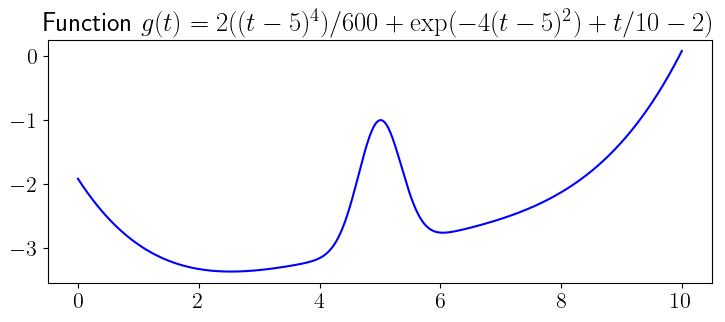

In [23]:
def psi(t: np.ndarray) -> np.ndarray:
    return 2 * ((t - 5) ** 4 / 600 + np.exp(-4 * (t - 5) ** 2) + t / 10 - 2)


def f(p: np.ndarray, t: np.ndarray, s: np.ndarray) -> np.ndarray:
    return 100 + (10 + p) * s * psi(t) - 2 * p

t = np.linspace(0, 10, data_size)

plt.plot(t, psi(t), color='blue')
plt.title('Function $g(t) = 2((t-5)^4)/600 + \exp(-4(t-5)^2) + t/10 - 2)$')
plt.savefig(f'{img_dir}/time_function.pdf')
plt.show()

In [26]:
min_t = 2.53379
min_psi_t = psi(min_t)
print(f'min psi(t): {min_psi_t}')
z = 3
min_p = 25 + min_psi_t * (z + 3) -3
print(f'min p: {min_p}')

max_t = 10
max_psi_t = psi(max_t)
print(f'max psi(t): {max_psi_t}')
z = 3
max_p = 25 + max_psi_t * (z + 3) + 3
print(f'max p: {max_p}')

min psi(t): -3.369931811094699
min p: 1.780409133431803
max psi(t): 0.08333333333333393
max p: 28.500000000000004


In [27]:
rng = np.random.default_rng(seed=0)
rho = 0.5
emotion = rng.choice(list(range(1, 8)), data_size)
time = rng.uniform(0, 10, data_size)
cost = rng.normal(0, 1.0, data_size)
noise_price = rng.normal(0, 1.0, data_size)
noise_demand = rho * noise_price + rng.normal(0, np.sqrt(1 - rho ** 2), data_size)
price = 25 + (cost + 3) * psi(time) + noise_price
structural: np.ndarray = f(price, time, emotion).astype(float)
outcome: np.ndarray = (structural + noise_demand).astype(float)

price_scale = (price - min_p) / (max_p - min_p)
sigmas = [0.2, 1, 1.8]
hetero_noise_demand = [rho * noise_price + rng.normal(0, price_scale * sigma, data_size) for sigma in sigmas]

In [25]:
# fig = px.scatter(x=price, y=noise_demand, width=800, height=400)
# fig.update_traces(marker_size=10)
# fig.show()

In [120]:
# from plotly.subplots import make_subplots
# import plotly.graph_objects as go

# fig = make_subplots(rows=2, cols=2, subplot_titles=(r'$\text{Demand Variance} = 1-\rho^2$ = 0.75$',
#                                                     r'$\text{Demand Variance} = r(p) * 0.2$', 
#                                                     r'$\text{Demand Variance} = r(p)$', 
#                                                     r'$\text{Demand Variance} = $r(p) * 1.8$'))

# fig.add_trace(go.Scatter(x=price, y=noise_demand, mode="markers", marker=dict(color='blue', size=10)), row=1, col=1)

# fig.add_trace(go.Scatter(x=price, y=hetero_noise_demand[0], mode="markers", marker=dict(color='blue', size=10)), row=1, col=2)

# fig.add_trace(go.Scatter(x=price, y=hetero_noise_demand[1], mode="markers", marker=dict(color='blue', size=10)), row=2, col=1)

# fig.add_trace(go.Scatter(x=price, y=hetero_noise_demand[2], mode="markers", marker=dict(color='blue', size=10)), row=2, col=2)

# fig.update_layout(height=800, width=1200, title_text="", showlegend=False)

# fig.show()

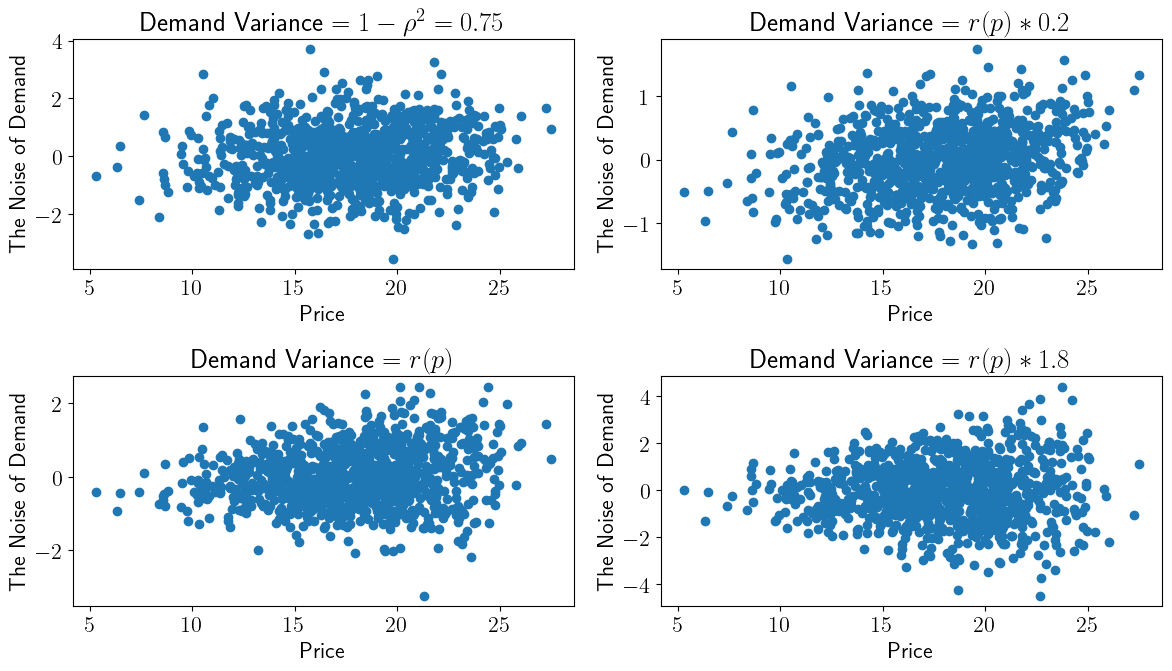

In [28]:
fig, axs = plt.subplots(2, 2, figsize=(12, 7))

axs[0, 0].scatter(price, noise_demand)
axs[0, 0].set_title(r'Demand Variance = $1-\rho ^2 = 0.75$')
axs[0, 0].set_ylabel('The Noise of Demand')
axs[0, 0].set_xlabel('Price')

axs[0, 1].scatter(price, hetero_noise_demand[0])
axs[0, 1].set_title(r'Demand Variance = $r(p) * 0.2$')
axs[0, 1].set_ylabel('The Noise of Demand')
axs[0, 1].set_xlabel('Price')

axs[1, 0].scatter(price, hetero_noise_demand[1])
axs[1, 0].set_title(r'Demand Variance = $r(p)$')
axs[1, 0].set_ylabel('The Noise of Demand')
axs[1, 0].set_xlabel('Price')

axs[1, 1].scatter(price, hetero_noise_demand[2])
axs[1, 1].set_title(r'Demand Variance = $r(p) * 1.8$')
axs[1, 1].set_ylabel('The Noise of Demand')
axs[1, 1].set_xlabel('Price')

fig.savefig(f'{img_dir}/demand_noise.pdf')